# binaryBHexp (Binary black hole explorer) demo
Description: Python package for making interactive, on-the-fly visualizations of precessing binary black hole mergers.   
Webpage: https://vijayvarma392.github.io/binaryBHexp/

Notebook author: Vijay Varma, 2020. (Contact: vijay.varma392@gmail.com, [vijayvarma.com](https://vijayvarma.com/))

Ever wanted to visualize a binary black hole merger on your laptop? You can now do that through the "Binary black hole explorer", thanks to the power of surrogate models. This package generates a movie within seconds at any point in the seven-dimensional parameter space of precessing binary black hole systems!

This notebook does a quick demo that can be run on a browser through binder, but it may be slower than installing and running from the command line. Fortunately, it only takes one command to install and one command to run, see https://vijayvarma392.github.io/binaryBHexp/#gen_your_own.

In [1]:
from __future__ import print_function

%matplotlib notebook
import binaryBHexp
import numpy as np
import matplotlib.pyplot as P

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
from ipywidgets import Button, Layout

## Installation
#### PyPi
`pip install binaryBHexp`
#### Source
See instructions in https://vijayvarma392.github.io/binaryBHexp/#gen_your_own

In [2]:
# Setup slider controls and default values
width = '275px'

q_slider = widgets.FloatSlider(
    value=1.35,
    min=1, max=2, step=0.01,
    description='q',
    layout={'width': width},
)
chiAmag_slider = widgets.FloatSlider(
    value=0.75,
    min=0, max=0.8, step=0.01,
    description='$\chi_1$',
    layout={'width': width},
)
chiAth_slider = widgets.FloatSlider(
    value=1.1,
    min=0, max=np.pi, step=0.01,
    description='$\\theta_1$',
    layout={'width': width},
)
chiAph_slider = widgets.FloatSlider(
    value=-0.4,
    min=-np.pi, max=np.pi, step=0.01,
    description='$\phi_1$',
    layout={'width': width},
)
chiBmag_slider = widgets.FloatSlider(
    value=0.75,
    min=0, max=0.8, step=0.01,
    description='$\chi_2$',
    layout={'width': width},
)
chiBth_slider = widgets.FloatSlider(
    value=1.1,
    min=0, max=np.pi, step=0.01,
    description='$\\theta_2$',
    layout={'width': width},
)
chiBph_slider = widgets.FloatSlider(
    value=2.75,
    min=-np.pi, max=np.pi, step=0.01,
    description='$\phi_2$',
    layout={'width': width},
)

controls = \
    HBox(children=[
        VBox(children=
            [q_slider
            ]),
        VBox(children=
            [chiAmag_slider,
            chiAth_slider,
            chiAph_slider,
            ]),
        VBox(children=
            [chiBmag_slider,
            chiBth_slider, 
            chiBph_slider
            ]),
        ])

<IPython.core.display.Javascript object>


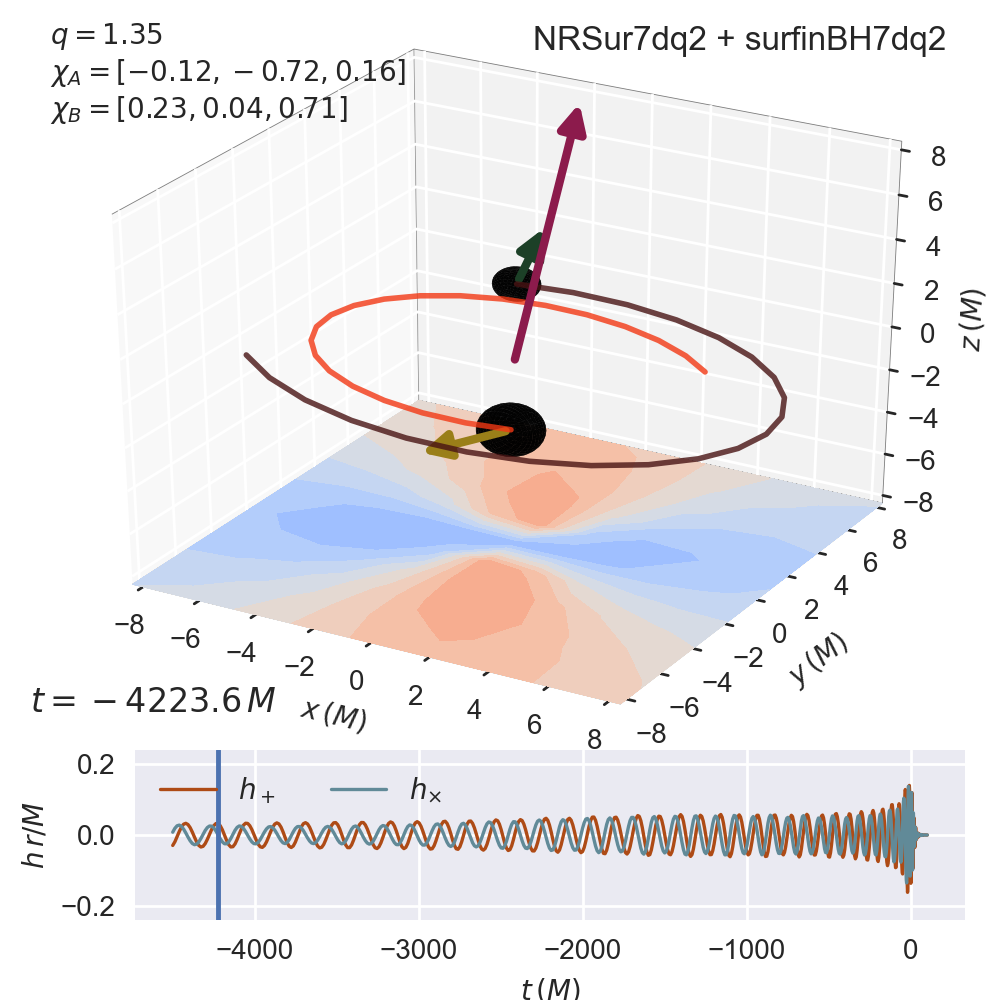

interactive(children=(Button(description='Run', style=ButtonStyle()), Output()), _dom_classes=('widget-interac…

In [3]:
# Use the sliders to pick your favorite parameters and hit Run
# If Rerunning with new parameters, It's better to run this cell again, change the sliders and hit run

display(controls)
fig = P.figure(figsize=(5,5))

@interact.options(manual=True, manual_name="Run")
def run_animation():
    q = q_slider.value
    chiAmag = chiAmag_slider.value
    chiAth = chiAth_slider.value
    chiAph = chiAph_slider.value
    chiBmag = chiBmag_slider.value
    chiBth = chiBth_slider.value
    chiBph = chiBph_slider.value

    chiA = [chiAmag*np.sin(chiAth)*np.cos(chiAph),
            chiAmag*np.sin(chiAth)*np.sin(chiAph),
            chiAmag*np.cos(chiAth)]

    chiB = [chiBmag*np.sin(chiBth)*np.cos(chiBph),
            chiBmag*np.sin(chiBth)*np.sin(chiBph),
            chiBmag*np.cos(chiBth)]
    
    line_ani = binaryBHexp.BBH_animation(fig, q, chiA, chiB)
    return line_ani